In [1]:
import os, sys
sys.path.append('../')
sys.path.append('/home/workspace/chencheng/Learning/ImageRetrieval/delf-pytorch/extract')
import cv2
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from extract.delf_feature import get_delf_feature

In [2]:
delf_model = get_delf_feature(keypoint_state_dict_path="/home/workspace/chencheng/Learning/ImageRetrieval/delf-pytorch/repository/attention/epoch_26_loss_1.84812.pth")

loading keypoints state-dict...
keypints state-dict loading done!


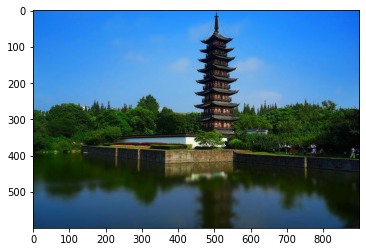

In [3]:
# test_img_root = '/home/workspace/chencheng/Learning/ImageRetrieval/delf-pytorch/datasets/index/'
# image_lists = os.listdir(test_img_root)
# test_img_path = os.path.join(test_img_root, random.sample(image_lists, 1)[0])
test_img_path = '/home/workspace/chencheng/Learning/ImageRetrieval/delf-pytorch/scripts/test_img/tower3.jpg'
img = plt.imread(test_img_path)
h, w = img.shape[0], img.shape[1]
img = img / 255.
img_resized = cv2.resize(img, (720, 720))
img_tensor = torch.from_numpy(img_resized).permute(2, 0, 1).unsqueeze(dim=0).float()
plt.imshow(img)

In [4]:
results = delf_model(img_tensor)
features, atte_scores = results['features'], results['atte_scores']
features = features.squeeze().mean(dim=0)
atte_scores = atte_scores.squeeze()
weighted_fea = features * atte_scores

([], <a list of 0 Text major ticklabel objects>)

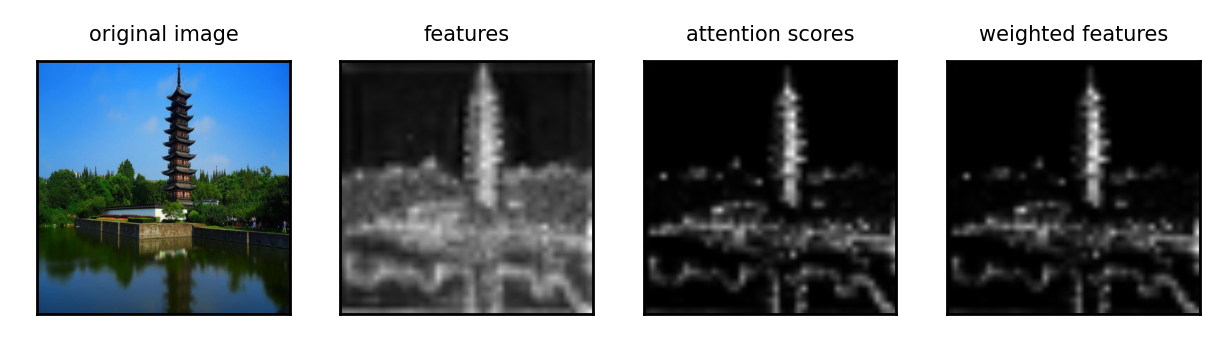

In [8]:
resized_fea = cv2.resize(features.detach().numpy(), (720, 720))
resized_scores = cv2.resize(atte_scores.detach().numpy(), (720, 720))
resized_weighted_fea = cv2.resize(weighted_fea.detach().numpy(), (720, 720))
cmap = 'gray'
plt.figure(dpi=250)
plt.subplot(141)
plt.imshow(img_resized, cmap=cmap)
plt.title('original image', fontdict={'fontsize': 6})
plt.xticks([])
plt.yticks([])
plt.subplot(142)
plt.imshow(resized_fea, cmap=cmap)
plt.title('features', fontdict={'fontsize': 6})
plt.xticks([])
plt.yticks([])
plt.subplot(143)
plt.imshow(resized_scores, cmap=cmap)
plt.title('attention scores', fontdict={'fontsize': 6})
plt.xticks([])
plt.yticks([])
plt.subplot(144)
plt.imshow(resized_weighted_fea, cmap=cmap)
plt.title('weighted features', fontdict={'fontsize': 6})
plt.xticks([])
plt.yticks([])